In [ ]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import datetime

In [ ]:
#Menyambungkan Ke drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## Data PPKM
data_ppkm = pd.read_csv('/content/gdrive/MyDrive/Skripsi/Data/Data Visual.csv')
## Data Twitter
data_twitter = data_ppkm.loc[ lambda data_twitter : data_twitter['service'] == 'twitter']
print(data_twitter.head())
print(data_twitter.shape)

In [ ]:
#data_twitter['date'] = sorted(data_twitter['date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").strftime('%d-%B')))
#data_twitter['time'] = data_twitter['time'].apply(lambda x: datetime.datetime.strptime(x, "%H:%M:%S").strftime('%H'))

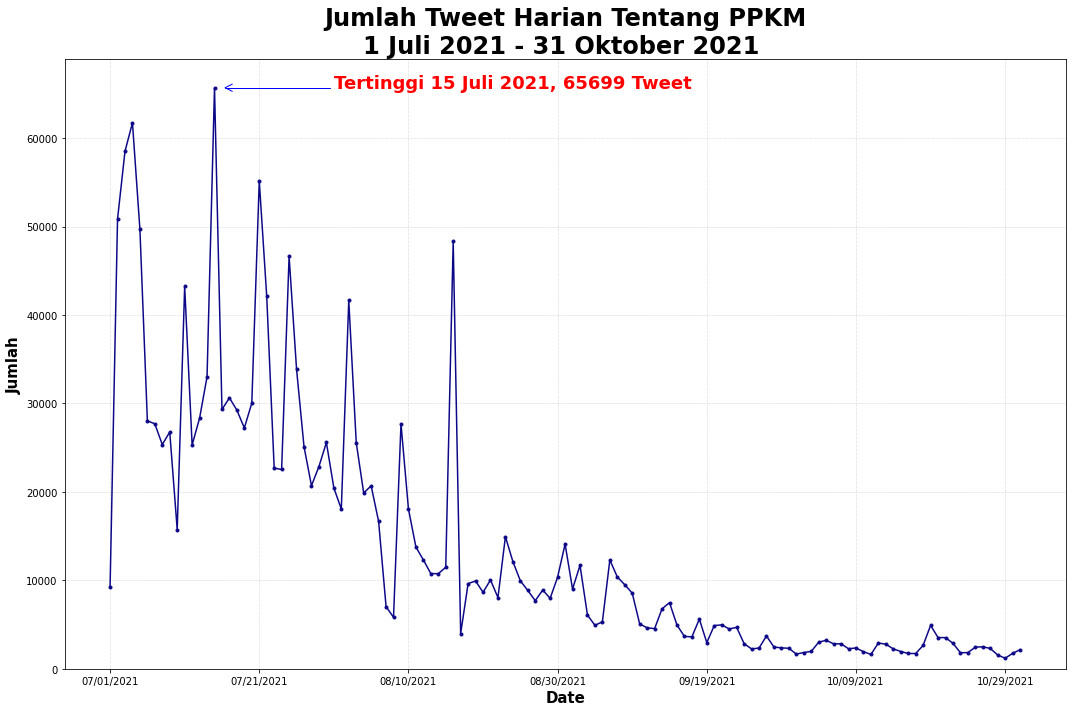

In [ ]:
data_twitter.groupby(['date'])['message'].count().plot(marker='.', cmap='plasma')
plt.title('Jumlah Tweet Harian Tentang PPKM\n1 Juli 2021 - 31 Oktober 2021 ',loc='center', fontsize=24, fontweight='bold')
plt.xlabel('Date', fontsize = 15, fontweight='bold')
plt.ylabel('Jumlah',fontsize = 15, fontweight='bold')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.annotate('Tertinggi 15 Juli 2021, 65699 Tweet', xy=(15, data_twitter.groupby(['date'])['message'].count().max()),
              xytext=(30,data_twitter.groupby(['date'])['message'].count().max()), weight='bold', color='red',
              fontsize=18,
              arrowprops=dict(arrowstyle='->',
              connectionstyle="angle",
              color='blue'))
plt.gcf().set_size_inches(15, 10)
plt.tight_layout()
plt.show()

In [ ]:
data_twitter.groupby(['date'])['message'].count().describe()

count      123.000000
mean     14029.487805
std      14883.181583
min       1195.000000
25%       2898.000000
50%       8556.000000
75%      21618.000000
max      65699.000000
Name: message, dtype: float64

In [ ]:
## Data Harian
data_twitter.groupby(['date'])['message'].count().describe()
data_harian = data_twitter.groupby(['date'])['message'].count()
data_harian.to_excel('data_harian.xlsx')

In [ ]:
data_twitter.groupby(['date'])['message'].count().describe()

count      123.000000
mean     14029.487805
std      14883.181583
min       1195.000000
25%       2898.000000
50%       8556.000000
75%      21618.000000
max      65699.000000
Name: message, dtype: float64

In [ ]:
data_harian.to_excel('data_harian.xlsx')

In [ ]:
1725627/123

14029.487804878048

In [ ]:
data_twitter['bulan'] = sorted(data_twitter['date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").strftime('%B')))
data_twitter['Jam'] = data_twitter['time'].apply(lambda x: datetime.datetime.strptime(x, "%H:%M:%S").strftime('%H'))
data_twitter.head()

,service,date,time,message,bulan,Jam
0,twitter,08/03/2021,23:59:00,RT @_pln_id:Abang lagi memelihara Isolator SUT...,August,23
1,twitter,08/03/2021,23:57:00,"@Askrlfess Semuanya di potong, bahkan bansos s...",August,23
2,twitter,08/03/2021,23:57:00,RT @KakekHalal:PPKM mereka ribut\nVaksin merek...,August,23
3,twitter,08/03/2021,23:57:00,paling benci laper tengah malam di masa ppkm. ...,August,23
4,twitter,08/03/2021,23:56:00,"RT @ABSetyono:PPKM LEVEL 4 DIPERPANJANG,MENKOM...",August,23


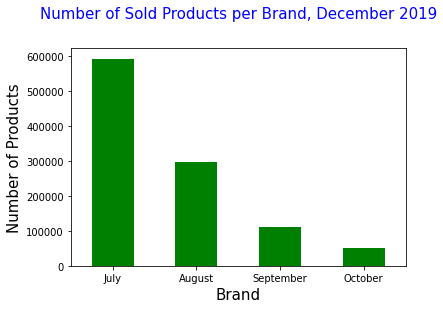

In [ ]:
plt.clf()
data_twitter.groupby('bulan')['message'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

In [ ]:
data_twitter.groupby(['bulan'])['message'].count().sort_values(ascending=False)

bulan
July         1033451
August        453791
September     164434
October        73951
Name: message, dtype: int64

In [ ]:
a= pd.DataFrame(data_twitter.groupby(['Jam'])['message'].count())

In [ ]:
a= pd.DataFrame(data_twitter.groupby(['Jam'])['message'].count())
a.to_excel('jumlah.xlsx')

In [ ]:
data_sentimen = pd.read_csv('/content/gdrive/MyDrive/Skripsi/Data/data_normalized+NO_Stopword.csv')
data_sentimen.head()

,service,date,time,message,sentimen,cleansing,case folding,Tokeneizing,normalized,steaming,stemming,filter,filtering
0,twitter,07/04/2021,8:47:00,RT @fsskroeppreal: PPKM - Pernah percaya kemud...,Negatif,RT PKM Pernah percaya kemudian menyesal,rt pkm pernah percaya kemudian menyesal,"['rt', 'pkm', 'pernah', 'percaya', 'kemudian',...","['rt', 'pkm', 'pernah', 'percaya', 'kemudian',...","['rt', 'pkm', 'pernah', 'percaya', 'kemudian',...","['pkm', 'percaya', 'menyesal']","['pkm', 'percaya', 'menyesal']","['pkm', 'percaya', 'sesal']"
1,twitter,10/16/2021,8:34:00,"RT @PolsekPupuan:Cegah Penyebaran Covid-19, Ka...",Positif,RT Cegah Penyebaran Covid Kapolsek Selbar bagi...,rt cegah penyebaran covid kapolsek selbar bagi...,"['rt', 'cegah', 'penyebaran', 'covid', 'kapols...","['rt', 'cegah', 'penyebaran', 'covid', 'kapols...","['rt', 'cegah', 'sebar', 'covid', 'kapolsek', ...","['cegah', 'penyebaran', 'covid', 'kapolsek', '...","['cegah', 'penyebaran', 'covid', 'kapolsek', '...","['cegah', 'sebar', 'covid', 'kapolsek', 'selba..."
2,twitter,07/12/2021,11:56:00,@Humas_SekMaos Pemerintah merevisi aturan Pemb...,Positif,SekMaos Pemerintah merevisi aturan Pemberlakua...,sekmaos pemerintah merevisi aturan pemberlakua...,"['sekmaos', 'pemerintah', 'merevisi', 'aturan'...","['sekmaos', 'pemerintah', 'merevisi', 'aturan'...","['sekmaos', 'perintah', 'revisi', 'atur', 'lak...","['sekmaos', 'pemerintah', 'merevisi', 'aturan'...","['sekmaos', 'pemerintah', 'merevisi', 'aturan'...","['sekmaos', 'perintah', 'revisi', 'atur', 'lak..."
3,twitter,07/15/2021,8:12:00,RT @Daeng_Info:Rekaman CCTV Oknum Satpol PP di...,Negatif,RT Info Rekaman CTV Oknum Satpol P di Kab Gowa...,rt info rekaman ctv oknum satpol p di kab gowa...,"['rt', 'info', 'rekaman', 'ctv', 'oknum', 'sat...","['rt', 'info', 'rekaman', 'ctv', 'oknum', 'sat...","['rt', 'info', 'rekam', 'ctv', 'oknum', 'satpo...","['info', 'rekaman', 'ctv', 'oknum', 'satpol', ...","['info', 'rekaman', 'ctv', 'oknum', 'satpol', ...","['info', 'rekam', 'ctv', 'oknum', 'satpol', 'p..."
4,twitter,07/19/2021,5:40:00,RT @detikcom:Kemenag mengumumkan petunjuk tekn...,Netral,RT Kemenag mengumumkan petunjuk teknis pelaksa...,rt kemenag mengumumkan petunjuk teknis pelaksa...,"['rt', 'kemenag', 'mengumumkan', 'petunjuk', '...","['rt', 'kemenag', 'mengumumkan', 'petunjuk', '...","['rt', 'kemenag', 'umum', 'tunjuk', 'teknis', ...","['kemenag', 'mengumumkan', 'petunjuk', 'teknis...","['kemenag', 'mengumumkan', 'petunjuk', 'teknis...","['kemenag', 'teknis', 'pelaksanan', 'kurban', ..."


In [ ]:
data_sentimen['sentimen'].value_counts()

Negatif    1630
Positif    1369
Netral     1355
Name: sentimen, dtype: int64

In [ ]:
data_positif = data_sentimen.loc[ lambda data_sentimen : data_sentimen['sentimen'] == 'Positif']
print(data_positif.head())
print(data_positif.shape)

    service        date      time  \
1   twitter  10/16/2021   8:34:00   
2   twitter  07/12/2021  11:56:00   
12  twitter  07/20/2021  15:16:00   
13  twitter  07/16/2021  10:23:00   
17  twitter  08/20/2021   8:54:00   

                                              message sentimen  \
1   RT @PolsekPupuan:Cegah Penyebaran Covid-19, Ka...  Positif   
2   @Humas_SekMaos Pemerintah merevisi aturan Pemb...  Positif   
12  Bantu pemerinth lawan Covid - 19 dg n mengikut...  Positif   
13  @PolisiSukoharjo #VaksinPerkuatImunitas PPKM C...  Positif   
17  @nurulrahma Jadi terbiasa meetup Virtual mbak ...  Positif   

                                            cleansing  \
1   RT Cegah Penyebaran Covid Kapolsek Selbar bagi...   
2   SekMaos Pemerintah merevisi aturan Pemberlakua...   
12  Bantu pemerinth lawan Covid dengan  mengikut e...   
13  VaksinPerkuatImunitas PKM Cegah Penyebaran pat...   
17  Jadi terbiasa metup Virtual mbak hehe Gapapa P...   

                                     

In [ ]:
data_negatif = data_sentimen.loc[ lambda data_sentimen : data_sentimen['sentimen'] == 'Negatif']
print(data_negatif.head())
print(data_negatif.shape)

   service        date      time  \
0  twitter  07/04/2021   8:47:00   
3  twitter  07/15/2021   8:12:00   
5  twitter  08/09/2021  20:53:00   
8  twitter  07/13/2021  20:18:00   
9  twitter  08/26/2021   9:54:00   

                                             message sentimen  \
0  RT @fsskroeppreal: PPKM - Pernah percaya kemud...  Negatif   
3  RT @Daeng_Info:Rekaman CCTV Oknum Satpol PP di...  Negatif   
5  RT @radenrauf:Kamu mau ga jadi pacar aku?\n\n"...  Negatif   
8  @afrkml Ners maap oot, aku udah beres isoman, ...  Negatif   
9  RT @OHMYV3NUS: @AREAJULID "PPKM diperpanjang t...  Negatif   

                                           cleansing  \
0            RT PKM Pernah percaya kemudian menyesal   
3  RT Info Rekaman CTV Oknum Satpol P di Kab Gowa...   
5  RT Kamu mau enggak jadi pacar aku Nanti ya aku...   
8  Ners map ot aku sudah beres isoman sudah swab ...   
9  RT PKM diperpanjang terus kapan kelarnya sih b...   

                                        case folding  \

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#add whatever settings you want
countVec = CountVectorizer()
#fit transform
cv = countVec.fit_transform(data_negatif['filtering'])

#feature names
cv_feature_names = countVec.get_feature_names()

#feature counts
feature_count = cv.toarray().sum(axis = 0)

#feature name to count
a = dict(sorted(zip(cv_feature_names, feature_count)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
sorted_values = sorted(a.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in a.keys():
        if a[k] == i:
            sorted_dict[k] = a[k]
            break

print(sorted_dict)

{'abas': 1, 'abdu': 2, 'abang': 3, 'adan': 4, 'adab': 5, 'abai': 6, 'adha': 7, 'adil': 8, 'agam': 9, 'ah': 10, 'angaran': 11, 'bisnis': 12, 'ajar': 13, 'alah': 14, 'banding': 15, 'acara': 16, 'angota': 17, 'asing': 18, 'hadap': 19, 'gelar': 20, 'akibat': 21, 'besok': 22, 'aparat': 23, 'coba': 24, 'protes': 25, 'giat': 26, 'dasar': 27, 'melangar': 28, 'beli': 29, 'agustus': 30, 'jual': 31, 'percaya': 32, 'dampak': 33, 'bandung': 34, 'com': 35, 'aksi': 36, 'sehat': 38, 'jawa': 39, 'ganti': 41, 'miskin': 42, 'bijak': 43, 'jokowi': 44, 'demo': 45, 'batas': 46, 'china': 47, 'dagang': 48, 'cari': 49, 'kasih': 51, 'mingu': 52, 'usaha': 53, 'buka': 54, 'bantu': 55, 'kerja': 56, 'tka': 57, 'anak': 58, 'atur': 59, 'vaksin': 60, 'pedas': 62, 'presiden': 64, 'pandemi': 65, 'tutup': 66, 'istilah': 67, 'pakai': 72, 'indonesia': 74, 'negara': 76, 'masuk': 78, 'kayak': 80, 'rumah': 81, 'butuh': 88, 'laku': 93, 'banget': 99, 'makan': 107, 'pelan': 108, 'jalan': 110, 'covid': 111, 'perintah': 119, 'oran

In [ ]:
from wordcloud import WordCloud

In [ ]:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

In [ ]:
kata1 = "".join(data_positif["filtering"].apply(lambda x : "".join(x)).tolist())

In [ ]:
kata1

"['cegah', 'sebar', 'covid', 'kapolsek', 'selbar', 'masker', 'gratis', 'masyarakat', 'pasar', 'surabrata', 'masker', 'pakaimasker', 'prokes', 'pkm', 'bersatulawancorona', 'polrestabanan']['sekmaos', 'perintah', 'revisi', 'atur', 'laku', 'batas', 'giat', 'masyarakat', 'pkm', 'darurat', 'laku', 'juli', 'disiplinsuksespkm', 'rumah']['bantu', 'pemerinth', 'lawan', 'covid', 'edar', 'atur', 'pkm', 'sehinga', 'lekas', 'kmbli', 'beraktifitas']['vaksinperkuatimunitas', 'pkm', 'cegah', 'sebar', 'patuh', 'guys', 'aneh']['metup', 'virtual', 'mbak', 'gapapa', 'pkm', 'covid', 'enyah', 'bebas', 'selamat', 'up']['lihat', 'dengar', 'baca', 'pelangar', 'protokol', 'sehat', 'atur', 'pkm', 'level', 'ata']['menteri', 'kordinator', 'bidang', 'maritim', 'investasi', 'luhut', 'binsar', 'pandjaitan', 'maf', 'rakyat', 'indonesia', 'pkm', 'darurat', 'optimal', 'tempobisnis']['kunjung', 'pangdam', 'xi', 'tpr', 'mayjen', 'tni', 'muhamad', 'nur', 'rahmad', 'rangka', 'kece', 'posko', 'pkm', 'mikro', 'tingkat', 'lura

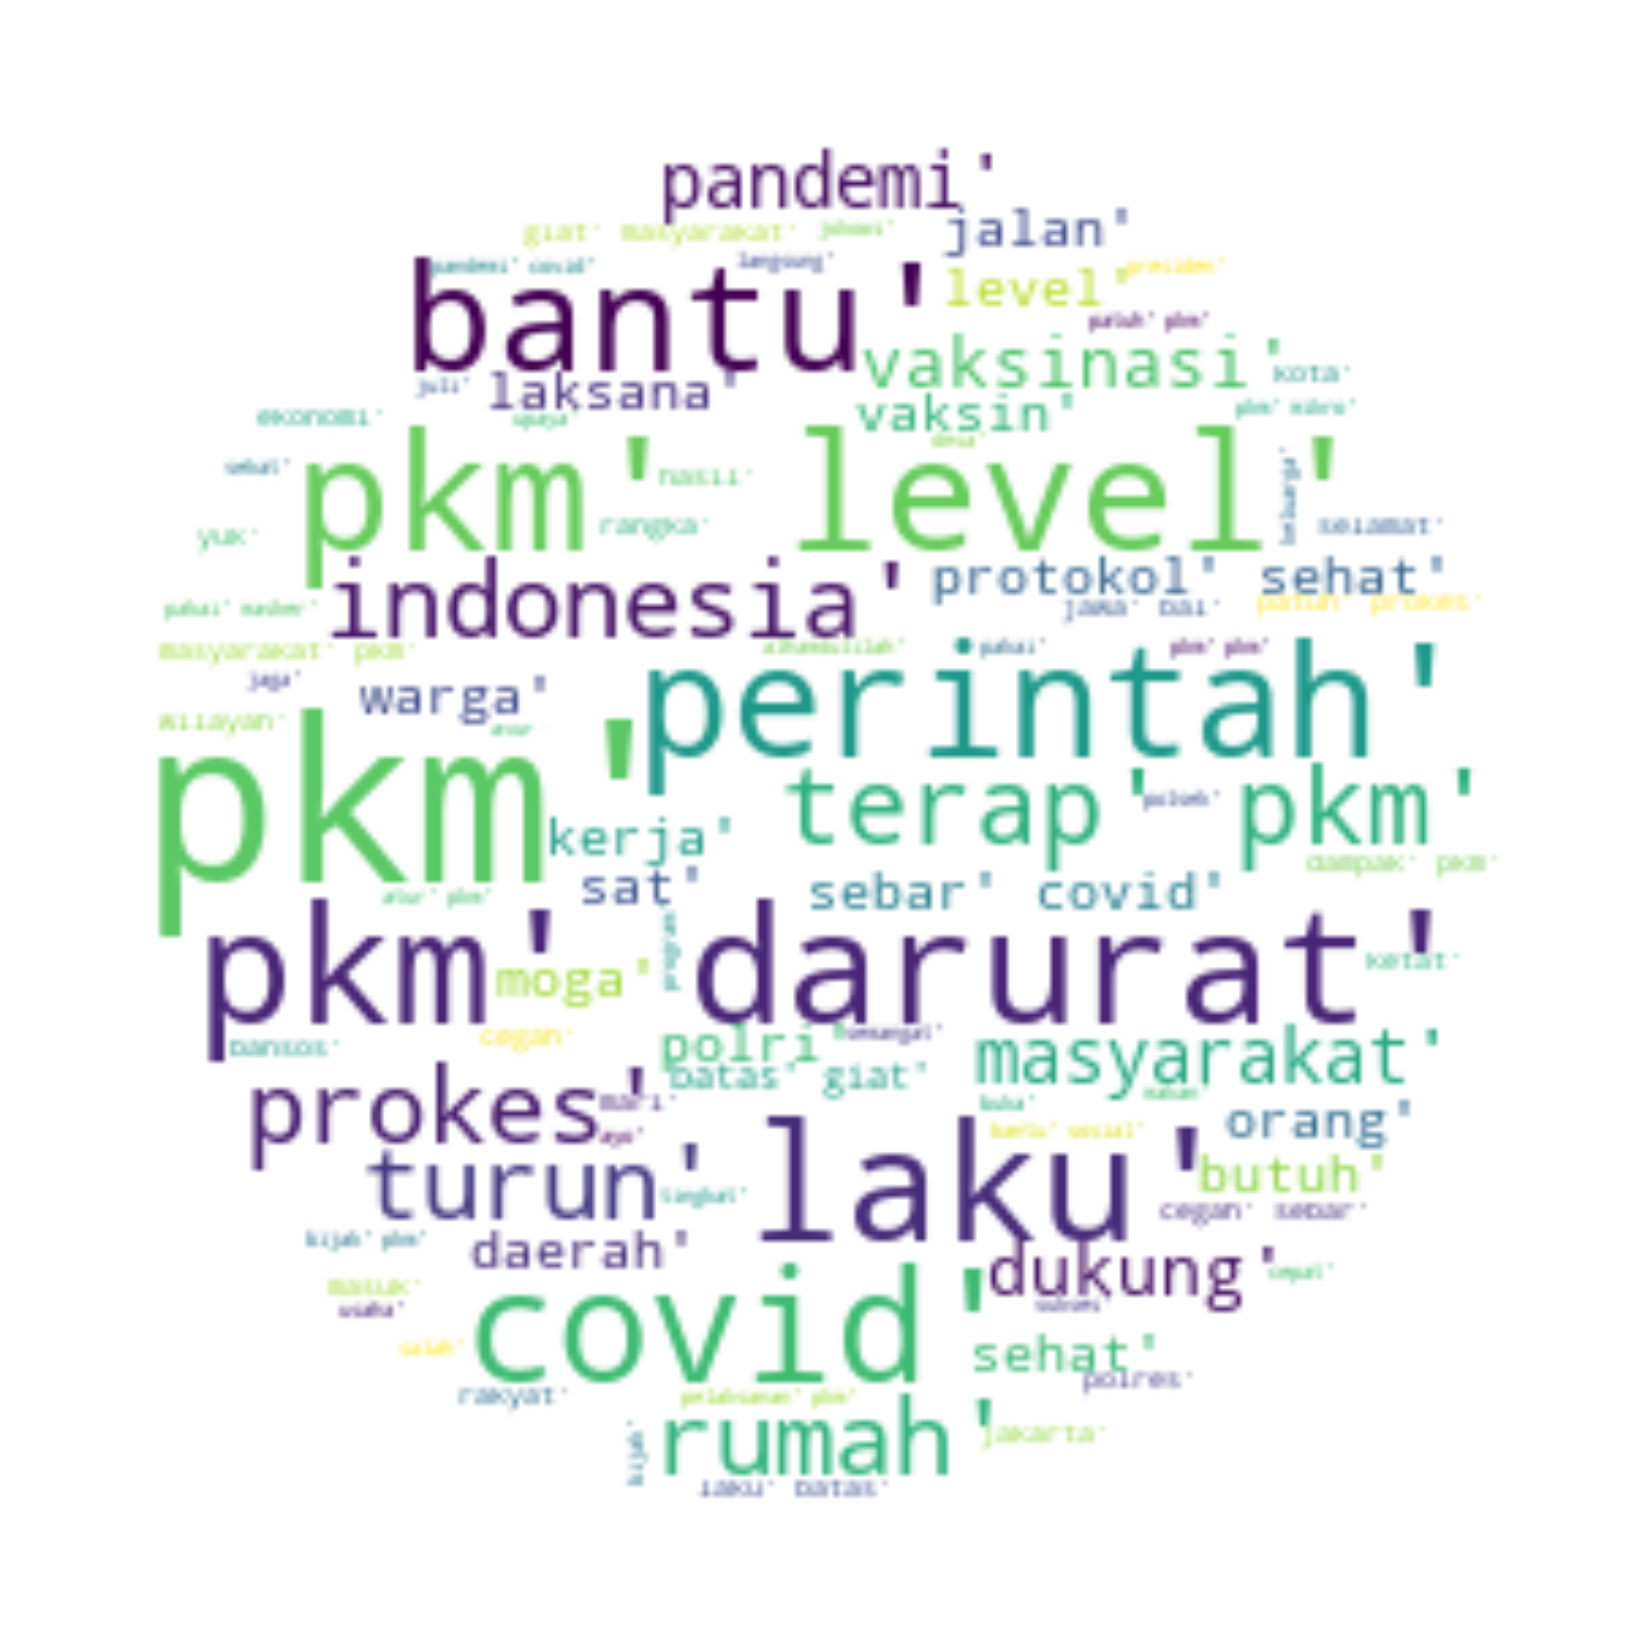

In [ ]:
wordcloud = WordCloud(repeat=True,
                      background_color='white', 
                      mask=mask).generate(kata1)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import datetime

#Menyambungkan Ke drive
drive.mount('/content/gdrive')

## Data PPKM
data_ppkm = pd.read_csv('/content/gdrive/MyDrive/Skripsi/Data/Data Visual.csv')
## Data Twitter
data_twitter = data_ppkm.loc[ lambda data_twitter : data_twitter['service'] == 'twitter']
print(data_twitter.head())
print(data_twitter.shape)

#Inisiasi waktu dan bulan
#data_twitter['date'] = sorted(data_twitter['date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").strftime('%d-%B')))
#data_twitter['time'] = data_twitter['time'].apply(lambda x: datetime.datetime.strptime(x, "%H:%M:%S").strftime('%H'))

##Grafik Harian
data_twitter.groupby(['date'])['message'].count().plot(marker='.', cmap='plasma')
plt.title('Jumlah Tweet Harian Tentang PPKM\n1 Juli 2021 - 31 Oktober 2021 ',loc='center', fontsize=24, fontweight='bold')
plt.xlabel('Date', fontsize = 15, fontweight='bold')
plt.ylabel('Jumlah',fontsize = 15, fontweight='bold')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.annotate('Tertinggi 15 Juli 2021, 65699 Tweet', xy=(15, data_twitter.groupby(['date'])['message'].count().max()),
              xytext=(30,data_twitter.groupby(['date'])['message'].count().max()), weight='bold', color='red',
              fontsize=18,
              arrowprops=dict(arrowstyle='->',
              connectionstyle="angle",
              color='blue'))
plt.gcf().set_size_inches(15, 10)
plt.tight_layout()
plt.show()


## Data Harian
data_twitter.groupby(['date'])['message'].count().describe()
data_harian = data_twitter.groupby(['date'])['message'].count()
data_harian.to_excel('data_harian.xlsx')

## Plot Bulanan 
plt.clf()
data_twitter.groupby('bulan')['message'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Jumlah Interaksi Bulanan',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Bulan', fontsize = 15)
plt.ylabel('Jumlah',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

## Data Plot Jam 
a= pd.DataFrame(data_twitter.groupby(['Jam'])['message'].count())
a.to_excel('jumlah.xlsx')

## WordCloud
data_sentimen = pd.read_csv('/content/gdrive/MyDrive/Skripsi/Data/data_normalized+NO_Stopword.csv')
data_sentimen.head()
data_sentimen['sentimen'].value_counts()
data_positif = data_sentimen.loc[ lambda data_sentimen : data_sentimen['sentimen'] == 'Positif']
print(data_positif.head())
print(data_positif.shape)
data_negatif = data_sentimen.loc[ lambda data_sentimen : data_sentimen['sentimen'] == 'Negatif']
print(data_negatif.head())
print(data_negatif.shape)
from wordcloud import WordCloud
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
# Wordcloud Positif
kata1 = "".join(data_positif["filtering"].apply(lambda x : "".join(x)).tolist())
wordcloud = WordCloud(repeat=True,
                      background_color='white', 
                      mask=mask).generate(kata1)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# Word Cloud Negatif
kata2 = "".join(data_negatif["filtering"].apply(lambda x : "".join(x)).tolist())
wordcloud = WordCloud(repeat=True,
                      background_color='white', 
                      mask=mask).generate(kata2)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

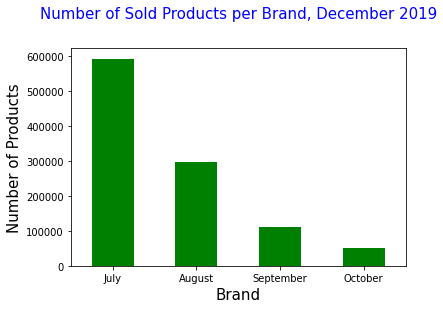